# RocketPy: Trajectory Simulation for High-Power Rocketry

Set up environment to run Colab notebook with:
- RocketPy
- netCDF4 (to get weather forecasts)
- Data files (we will clone RocketPy's repository for these)

In [1]:
!pip install rocketpy netCDF4
!git clone https://github.com/giovaniceotto/RocketPy.git #clones rocketpy library off github

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.8/278.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.2 MB/s eta 0:00:00
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=0ff8c41bc35edbe1a814aefe36a226b351aaa244a6122320fcd068a24abc197e
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml
Cloning into 'RocketPy'...
remote: Enumerating objects: 18370, done.
remote: Counting objects: 100% (4773/4773), done.
remote: Compressing objects: 100% (1081/1081), done.
remote: Total 18370 (delta 4097), reused 3993 (delta 3690), pack-reused 13597
Receiving objects: 100% (18370/18370), 784.73 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (13

In [2]:
import os #operating system

os.chdir("RocketPy/docs/notebooks") #directory paths (in files)

Simplified rocket trajectory simulation:

In [3]:
from rocketpy import Environment, SolidMotor, Rocket, Flight #Importing rocketpy modules

In [4]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
#Makes matplotlib plots (shown later interactive & higher quality)

Setting Up a Simulation

Create a Launch Environment (Spaceport America):

In [7]:
Env = Environment(
    #railLength=5.2,
    latitude=32.990254,
    longitude=-106.974998,
    elevation=1500 #expected height cannot be lower than elevation
) #sets environment simulation conditions (from Spaceport)

In [8]:
#To get weather from GFS (global forecast system) forecast at Spaceport(USA), set tomorrow's date:

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

Env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Denver")

In [9]:
#Tell Env to use GFS forecast to get the atmospheric conditions for flight

Env.set_atmospheric_model(type='Forecast', file='GFS') #forecast infomation gathered according to date

/usr/local/lib/python3.10/dist-packages/rocketpy/environment/environment.py:2123: UserWarning: Exact chosen launch time is not available in the provided file, using 2024-02-22 18:00:00 UTC instead.
  warnings.warn(



Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.036 km (ASL): 9.5562 m/s²


Launch Site Details

Launch Date: 2024-02-22 19:00:00 UTC | 2024-02-22 12:00:00 America/Denver
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.036 km
Forecast Time Period: From  2024-02-21 06:00:00  to  2024-03-08 06:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 3.46 m/s
Surface Wind Direction: 334.35°
Surface Wind Heading: 154.35°
Surface Pressure: 855.22 hPa
Surface Temperature: 283.87 K
Surface Air Density: 1.049 kg/m³
Surface Speed of Sound: 337.7

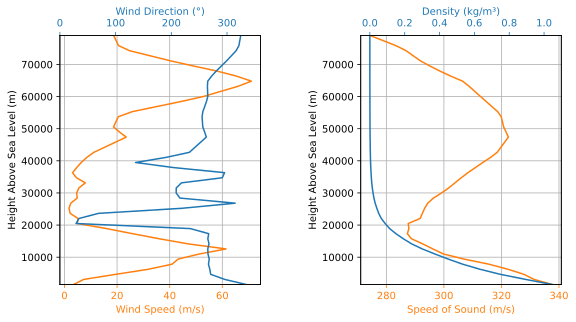

In [10]:
#calls info method, see what weather will look like

Env.info() #wind direction and density at varying altitudes (graphs)

SolidMotor Class:

Requires user to have a thrust curve ready (from .eng file for a commerical motor or .csv file from a static test measurement)

Other parameters: grain properties, nozzle dimnesions also given

In [11]:
Pro75M1670 = SolidMotor(
    thrust_source="../../data/motors/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass_position=0.317,
    grains_center_of_mass_position=0.397,
    burn_time=3.9,
    grain_number=5,
    grain_separation=0.005,
    grain_density=1815,
    grain_outer_radius=0.033,
    grain_initial_inner_radius=0.015,
    grain_initial_height=0.12,
    nozzle_radius=0.033,
    throat_radius=0.011,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

In [12]:
help(SolidMotor)

Help on class SolidMotor in module rocketpy.motors.solid_motor:

class SolidMotor(rocketpy.motors.motor.Motor)
 |  SolidMotor(thrust_source, dry_mass, dry_inertia, nozzle_radius, grain_number, grain_density, grain_outer_radius, grain_initial_inner_radius, grain_initial_height, grain_separation, grains_center_of_mass_position, center_of_dry_mass_position, nozzle_position=0, burn_time=None, throat_radius=0.01, reshape_thrust_curve=False, interpolation_method='linear', coordinate_system_orientation='nozzle_to_combustion_chamber')
 |  
 |  Class to specify characteristics and useful operations for solid motors.
 |  
 |  Inherits from the abstract class rocketpy.Motor.
 |  
 |  See Also
 |  --------
 |  Motor
 |  
 |  Attributes
 |  ----------
 |  SolidMotor.coordinate_system_orientation : str
 |      Orientation of the motor's coordinate system. The coordinate system
 |      is defined by the motor's axis of symmetry. The origin of the
 |      coordinate system may be placed anywhere along

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



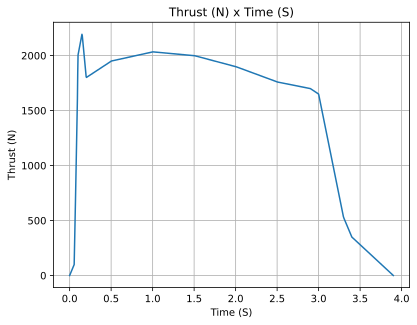

In [14]:
Pro75M1670.info() #Sees thrust curve - burnout at very end (oscillations after launch), shows when thrust decreases - release parachute
#Curve represents the energy of the thrust

Create a Rocket:

Composed of several components (motor, few aerodynamic surfaces, parachutes)

Rocket named Calisto (Pro75M1670 engine, entering its inertia properties, dimensions and drag curves)

In [15]:
#body/tube of rocket
calisto = Rocket(
    radius=0.0635,
    mass=14.426,  # without motor
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="../../data/calisto/powerOffDragCurve.csv",
    power_on_drag="../../data/calisto/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

calisto.add_motor(Pro75M1670, position=-1.255)

nose = calisto.add_nose(
    length=0.55829, kind="vonKarman", position=1.278
)

buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
) #buttons - how holds on the rails

Adding Aerodynamic Surfaces:

In [16]:
fins = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.040,
    span=0.100,
    sweep_length=None,
    cant_angle=0,
    position=-1.04956,
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

# see Nose cone design https://en.wikipedia.org/wiki/Nose_cone_design

Adding Parachutes:

Two parachutes Drogue and Main (Main pulls up, Drogue gives stability).

RocketPy allows you to define trigger functions - decided when to activate the ejection (pressure measurement)

automatically released parachutes

In [17]:
def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]. # when reaches z, automatically deploy drougue chute y[5]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3] # drogue chute to give way to main chute
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False

main = calisto.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=800,  # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = calisto.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [ ]:
#calistro.parachutes.remove(drogue)
#calistro.parachutes.remove(main) # USE TO DELETE PARACHUTES INCASE RUN MANY TIMES, or else addition 2 parachutes added

Simulating a Flight:


In [18]:
test_flight = Flight(
  rocket=calisto, environment=Env, rail_length=5.2, inclination=85, heading=0
) #rail buttons initially set to 5.2 (may be altered for rail buttons flight apogee experiments later)

In [19]:
test_flight.info()


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -3.12 m/s
Lateral Surface Wind Speed: -1.50 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.208 m/s
Rail Departure Stability Margin: 1.430 c
Rail Departure Angle of Attack: 7.433°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 2.012e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 654.645 m (AGL)
Rocket velocity at burn out: 279.871 m/s
Freestream velocity at burn out: 280.418 m/s
Mach Number at burn out: 0.839
Kinetic energy at burn o


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -3.12 m/s
Lateral Surface Wind Speed: -1.50 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.208 m/s
Rail Departure Stability Margin: 1.430 c
Rail Departure Angle of Attack: 7.433°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 2.012e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 654.645 m (AGL)
Rocket velocity at burn out: 279.871 m/s
Freestream velocity at burn out: 280.418 m/s
Mach Number at burn out: 0.839
Kinetic energy at burn o

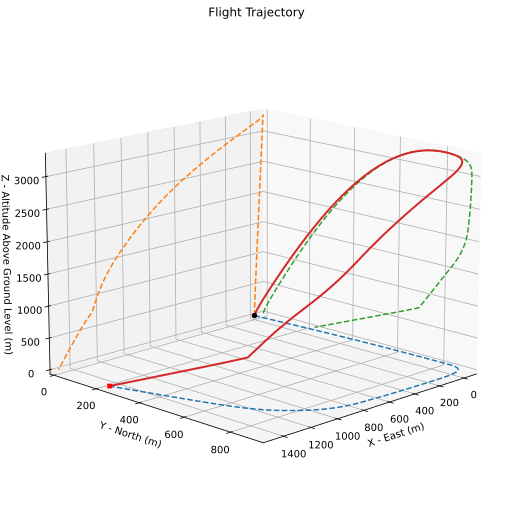



Trajectory Kinematic Plots



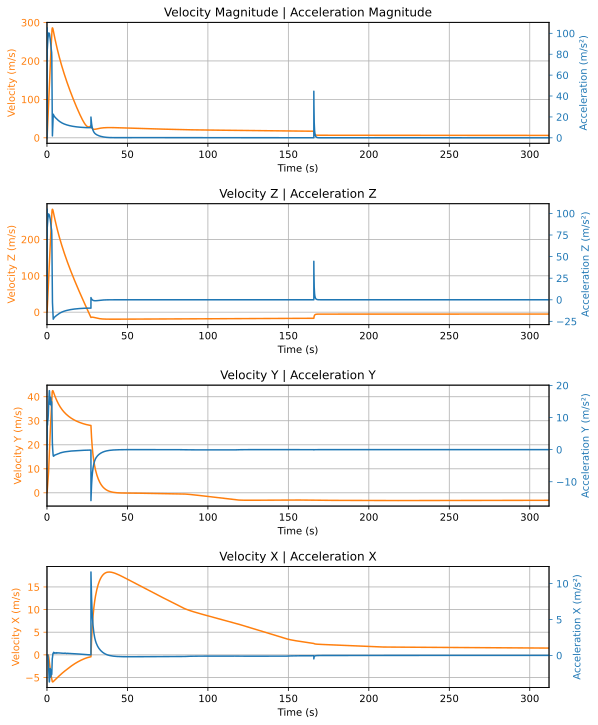



Angular Position Plots



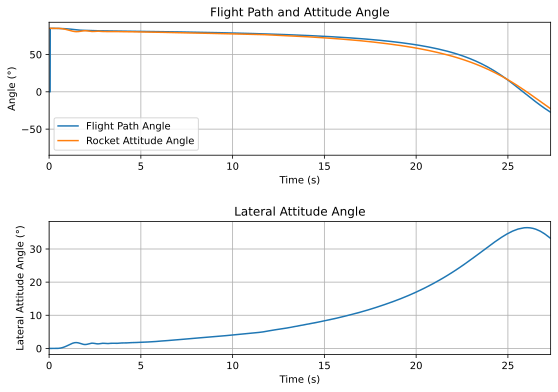



Path, Attitude and Lateral Attitude Angle plots



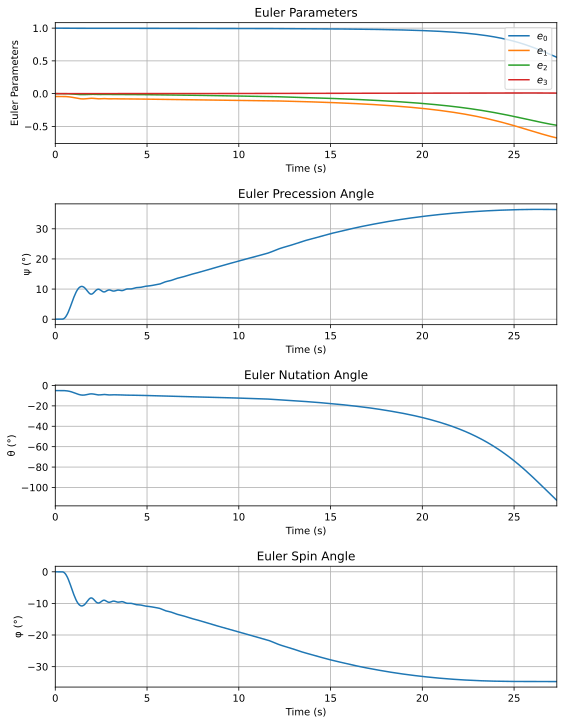



Trajectory Angular Velocity and Acceleration Plots



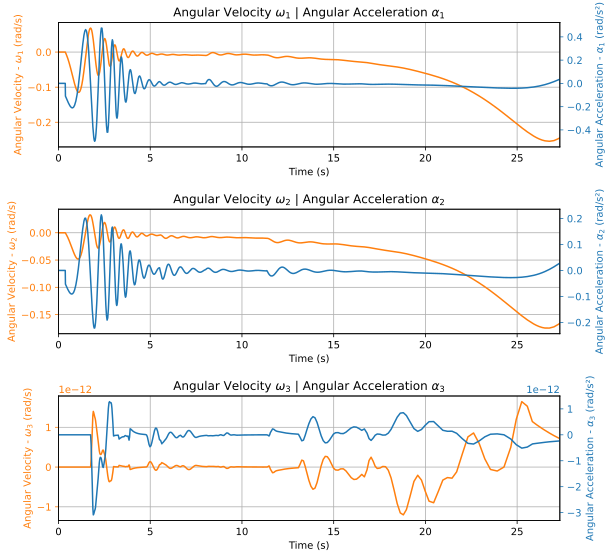



Aerodynamic Forces Plots



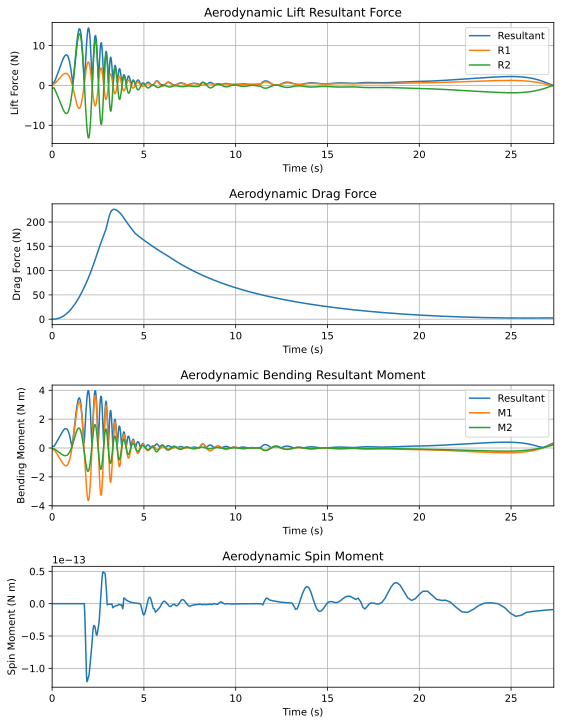



Rail Buttons Forces Plots



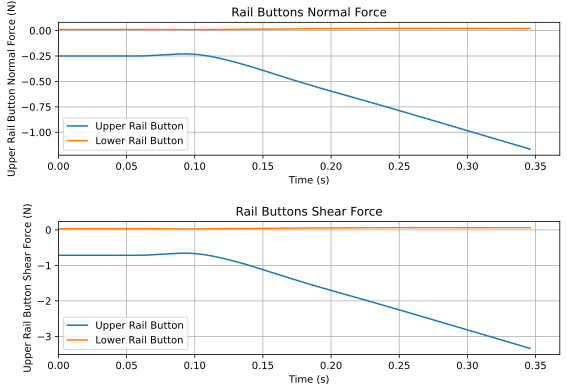



Trajectory Energy Plots



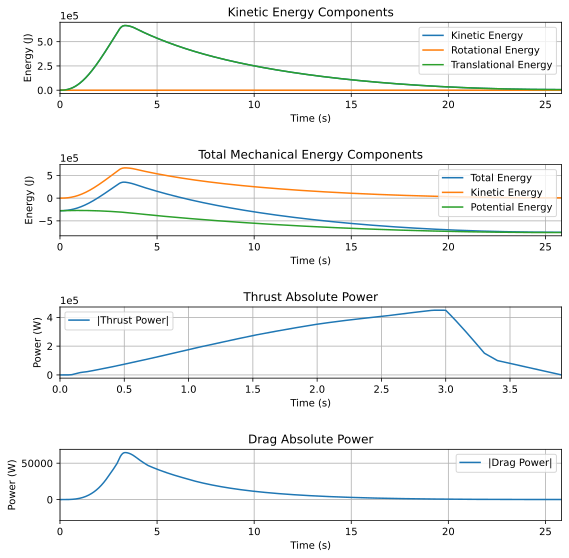



Trajectory Fluid Mechanics Plots



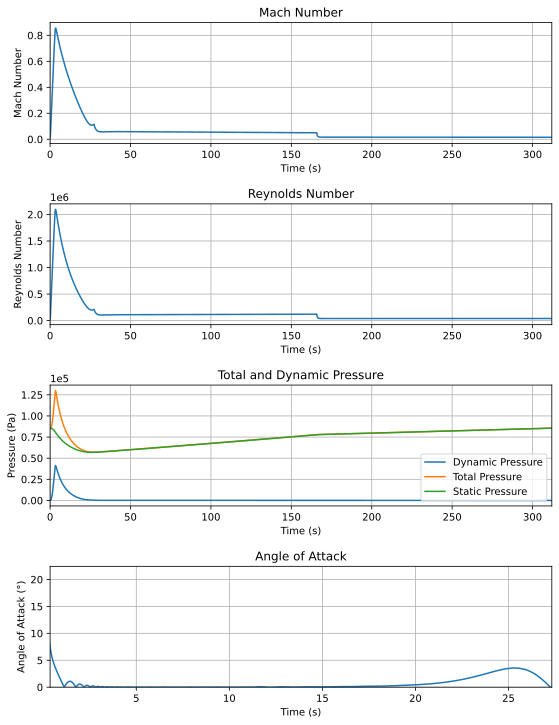



Trajectory Stability and Control Plots



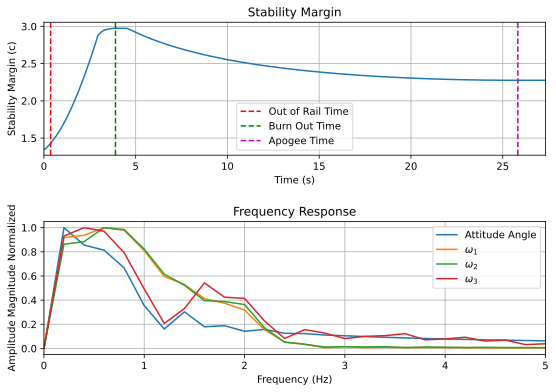



Rocket and Parachute Pressure Plots



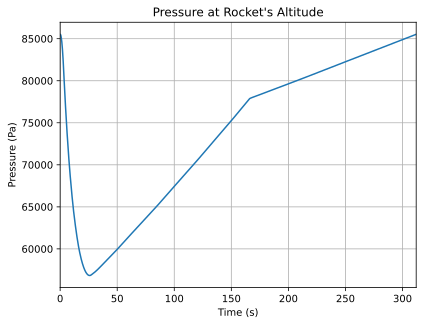


Parachute:  main


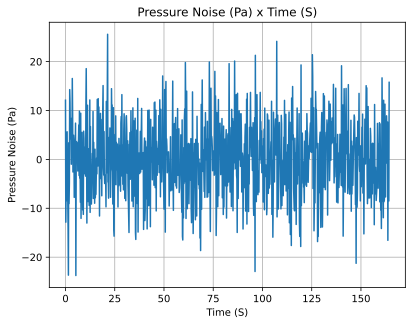

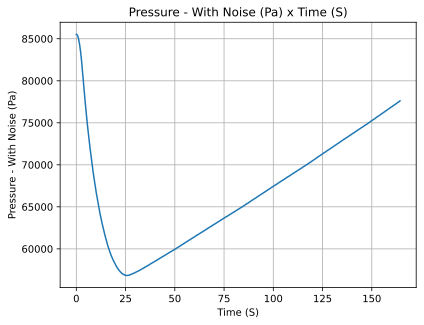

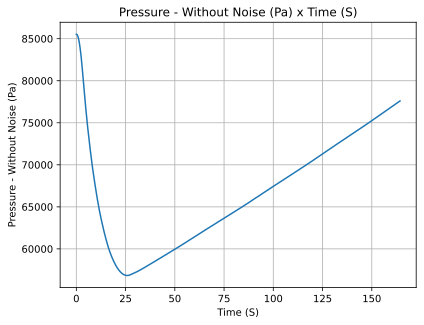


Parachute:  drogue


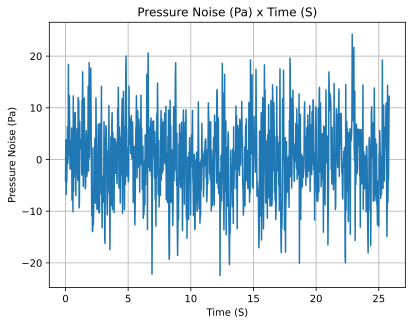

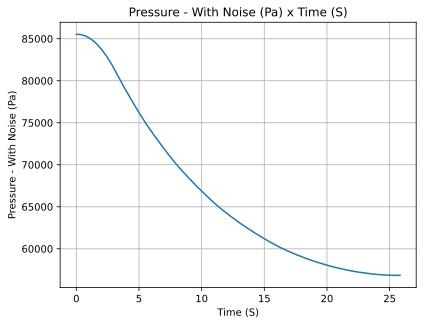

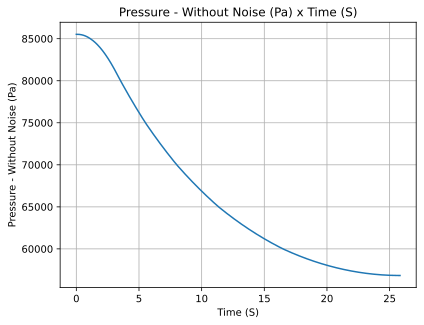

In [20]:
test_flight.all_info() #Apogee - highest altitude

In [ ]:
#test_flight.export_kml(file_name='test_flight.kml', extrude=True) ONLY WORKS IN PYCHARM, FINDS LANDING ON GOOGLE MAPS

Anaylsing Results: